In [1]:
%config IPCompleter.greedy=True

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
rs=check_random_state(1000)
#splits data set to test set and train set
#rs is random seed

In [3]:
import numpy as np
X=np.random.uniform(0.0,1.0,size=(10,2))
Y=np.random.choice(('Male','Female','None'),size=(10))
print(X[0])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yt=le.fit_transform(Y)
print(yt)
for i in yt:
    print(le.classes_[i],end=' ')
#this enables a system to assign proper intiger for classification 

[ 0.44142435  0.36476355]
[1 1 0 0 2 1 1 1 2 1]
Male Male Female Female None Male Male Male None Male 

In [4]:
from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()
yb=lb.fit_transform(Y)
print(yb)
print(lb.inverse_transform(yb))
#this returns a vector instead of just one int

[[0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]
['Male' 'Male' 'Female' 'Female' 'None' 'Male' 'Male' 'Male' 'None' 'Male']


In [5]:
from sklearn.feature_extraction import DictVectorizer, FeatureHasher
dv= DictVectorizer()
data=[
{'feature_1':10.0, 'feature_2':15.0},
{'feature_1':-5.0, 'feature_3':22.0},
{'feature_3':10.0, 'feature_4':10.0}
]
Y_dict = dv.fit_transform(data)
Y_dict.todense()
dv.vocabulary_
# a good vector for transforming dict to vectors

{'feature_1': 0, 'feature_2': 1, 'feature_3': 2, 'feature_4': 3}

In [6]:
fh= FeatureHasher()
Y_hashed = fh.fit_transform(data)
Y_hashed.todense()

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
from sklearn.preprocessing import OneHotEncoder
data= [
    [0,10],
    [1,11],
    [1,8],
    [0,12],
    [0,15]
]
oh = OneHotEncoder(categorical_features=[0])
Y_oh = oh.fit_transform(data)
Y_oh.todense()
# I did not understand this one. I need to see documentations
 

matrix([[  1.,   0.,  10.],
        [  0.,   1.,  11.],
        [  0.,   1.,   8.],
        [  1.,   0.,  12.],
        [  1.,   0.,  15.]])

In [8]:
from sklearn.preprocessing import Imputer
data= np.array([[1, np.nan,2],[2,3,np.nan],[-1,4,2]])
imp = Imputer(strategy='mean')
imp.fit_transform(data)
# this replaces the missing data with special strategy

array([[ 1. ,  3.5,  2. ],
       [ 2. ,  3. ,  2. ],
       [-1. ,  4. ,  2. ]])

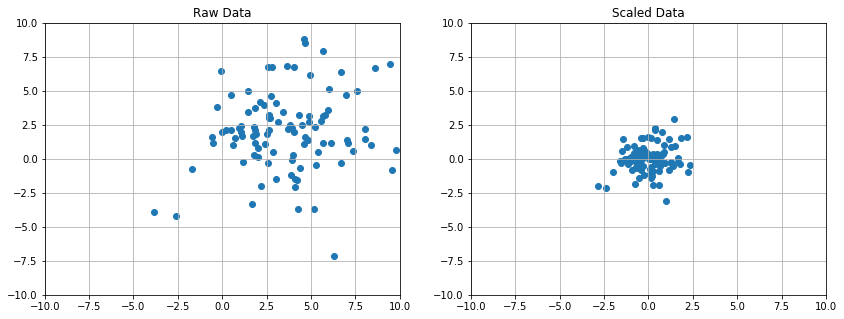

In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
data=np.ndarray(shape=(100,2))
for i in range(100):
    data[i,0]=2.0 + np.random.normal(1.5,3)
    data[i,1]=0.5 + np.random.normal(1.5,3)
    
fig, ax= plt.subplots(1,2,figsize=(14,5))


ss= StandardScaler()
scaled_data = ss.fit_transform(data)


ax[0].scatter(data[:,0],data[:,1])
ax[0].set_xlim([-10,10])
ax[0].set_ylim([-10,10])
ax[0].grid()
ax[0].set_title('Raw Data')


ax[1].scatter(scaled_data[:,0],scaled_data[:,1])
ax[1].set_xlim([-10,10])
ax[1].set_ylim([-10,10])
ax[1].grid()
ax[1].set_title('Scaled Data')
plt.show()

# a good tool for scaling


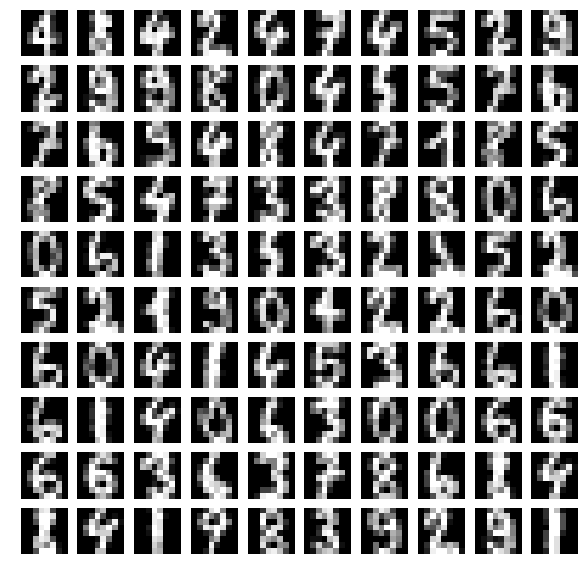

In [10]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits() 
selection = np.random.randint(0,1797,size=100)

fig, ax =plt.subplots(10,10,figsize=(10,10))

samples = [digits.data[x].reshape((8,8)) for x in selection]

for i in range(10):
    for j in range(10):
        ax[i,j].set_axis_off()
        ax[i,j].imshow(samples[(i*8)+j ],cmap='gray')
        
plt.show()
pca= PCA(n_components=36, whiten='true')
X_pca= pca.fit_transform(digits.data /255)

In [11]:
pca.explained_variance_ratio_

array([ 0.14890594,  0.13618771,  0.11794594,  0.08409979,  0.05782415,
        0.0491691 ,  0.04315987,  0.03661373,  0.03353248,  0.03078806,
        0.02372341,  0.02272697,  0.01821863,  0.01773855,  0.01467101,
        0.01409716,  0.01318589,  0.01248138,  0.01017718,  0.00905617,
        0.00889538,  0.00797123,  0.00767493,  0.00722904,  0.00695889,
        0.00596081,  0.00575615,  0.00515158,  0.0048954 ,  0.00428888,
        0.00373606,  0.00353273,  0.00336684,  0.0032803 ,  0.0030832 ,
        0.00293778])

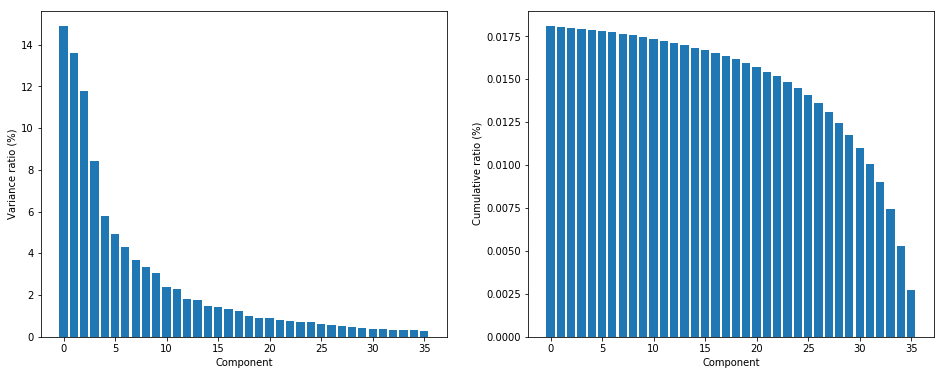

In [12]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Variance ratio (%)')
ax[0].bar(np.arange(36),pca.explained_variance_ratio_ * 100)

ax[1].set_xlabel('Component')
ax[1].set_ylabel('Cumulative ratio (%)')
ax[1].bar(np.arange(36),np.cumsum(pca.explained_variance_)[::-1])

plt.show()

# need to learn more about this

      fun: 0.010478223958332563
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00073255,  0.00603166])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 77
      nit: 5
   status: 2
  success: False
        x: array([ 1.77721898,  1.00759569])


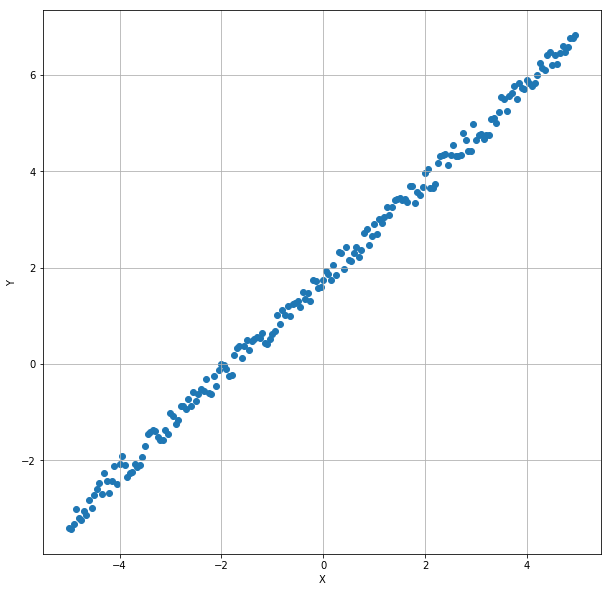

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def loss(v):
    e=0.0
    for i in range(nb_samples):
        e+=np.square(v[0]+v[1]*X[i]- Y[i])
        return .5*e
def gradient(v):
    g=np.zeros(shape=2)
    for i in range(nb_samples):
        g[0]+=(v[0]+v[1]*X[i]-Y[i])
        g[1]+=((v[0]+v[1]*X[i]-Y[i])*X[i])
    return g 
def show_dataset(X,Y):
    fig, ax= plt.subplots(1,1,figsize=(10,10))
    ax.scatter(X,Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid()
    plt.show()

X=np.arange(-5,5,0.05)
nb_samples = 200
Y=X+2
Y+= np.random.uniform(-.5,.05,size=nb_samples)
print(minimize(fun=loss, x0=np.array([0.0,0.0]), jac=gradient,method='L-BFGS-B'))
show_dataset(X,Y)

#this is regiular way for linear regression in Python

In [14]:
from sklearn.datasets import load_boston
boston= load_boston()
import matplotlib.pyplot as plt

def show_dataset(data):
    fig,ax=plt.subplots(4,3,figsize=(20,15))
    
    for i in range(4):
        for j in range(3):
            ax[i,j].plot(data.data[:,i+(j+1)*3])
            ax[i,j].grid()
    plt.show()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(boston.data,boston.target,test_size=0.1)
lr=LinearRegression(normalize=True)
print(lr.fit(X_train,Y_train))
print(lr.score(X_test,Y_test))

#simple linear regression in scikit-learn

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
0.552523875757


In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr,boston.data,boston.target,cv=7,scoring='neg_mean_squared_error')
print(scores.mean())
print(scores.std())
print('y = ' + str(lr.intercept_)+' ')
for i,c in enumerate(lr.coef_):
    print(str(c)+' *x'+ str(i))

    
#intercetp_ and coef_ are there to show numbers!

-36.8592194264
45.7049739006
y = 33.5611444613 
-0.094454373159 *x0
0.0399889008753 *x1
0.0405912856899 *x2
3.19237233228 *x3
-17.8194824927 *x4
4.35744913011 *x5
-0.00326339986979 *x6
-1.40737998162 *x7
0.273832787046 *x8
-0.012456698825 *x9
-0.997439080416 *x10
0.00867612251008 *x11
-0.479919728241 *x12


In [16]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge
diabetes = load_diabetes()

lr=LinearRegression(normalize=True)
rg=Ridge(.0001, normalize=True)

lr_scores= cross_val_score(lr,diabetes.data,diabetes.target, cv=10)
print(lr_scores.mean())
rg_scores= cross_val_score(rg,diabetes.data,diabetes.target, cv=10)
print(rg_scores.mean())
# Ridge fits and applies weights in calculating Cost Function

0.461962361958
0.46200012971


In [17]:
from sklearn.linear_model import RidgeCV

rg=RidgeCV(alphas=(1.0,0.1,.01,0.005,.0025,0.001,0.00025),normalize=True)
print(rg.fit(diabetes.data, diabetes.target))
rg.alpha_
# another fitting option. Lasso and ElasticNet are there too, need more study

RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)


0.0050000000000000001

[ 2.0039849] [[ 0.99451264]]


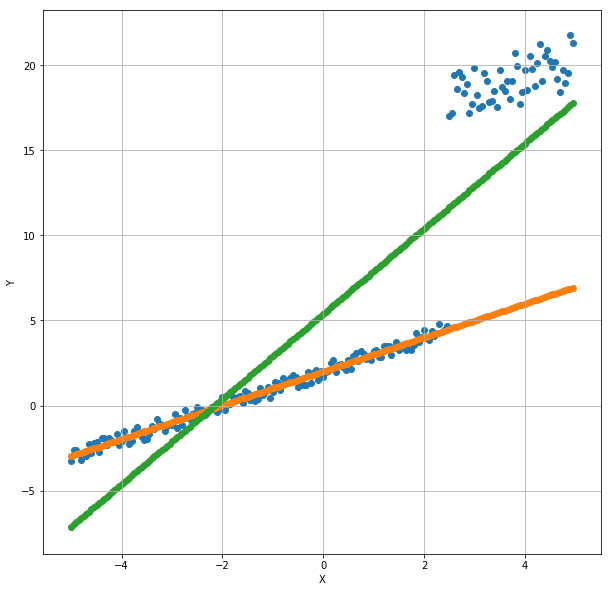

In [18]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import RANSACRegressor
nb_samples=200
nb_noise_samples=150
X=np.arange(-5,5,.05)

Y=X+2
Y+= np.random.uniform(-0.5,0.5, size=nb_samples)
for i in range(nb_noise_samples,nb_samples):
    Y[i]+=np.random.uniform(12,15)
    
lr=LinearRegression(normalize=True)
lr.fit(X.reshape(-1,1),Y.reshape(-1,1))
lr.intercept_

rs=RANSACRegressor(lr)
rs.fit(X.reshape(-1,1),Y.reshape(-1,1))
print(rs.estimator_.intercept_,
rs.estimator_.coef_)

#def show_dataset(X,Y):
fig, ax= plt.subplots(1,1,figsize=(10,10))
ax.scatter(X,Y)
ax.scatter(X,rs.estimator_.coef_*X+rs.estimator_.intercept_)
ax.scatter(X,lr.coef_*X+lr.intercept_)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
plt.show()
# this is for removing date that should not be there

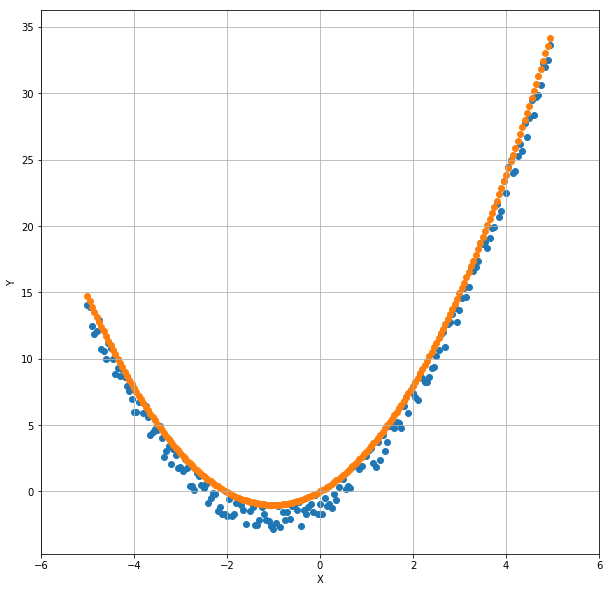

In [19]:
from sklearn.preprocessing import PolynomialFeatures
nb_samples=200
X=np.arange(-5,5,0.05)
Y = X**2 +2*X + np.random.uniform(-1,1,size=nb_samples) -1
pf= PolynomialFeatures(degree=2)
Xp= pf.fit_transform(X.reshape(-1,1))
lr.fit(Xp,Y.reshape(-1,1))


fig, ax= plt.subplots(1,1,figsize=(10,10))
ax.scatter(X,Y)
ax.scatter(X,Xp[:,0]*lr.coef_[0,0] + Xp[:,1]*lr.coef_[0,1]+Xp[:,2]*lr.coef_[0,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-6,6)
ax.grid()
plt.show() 
#for polynomial regression

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 

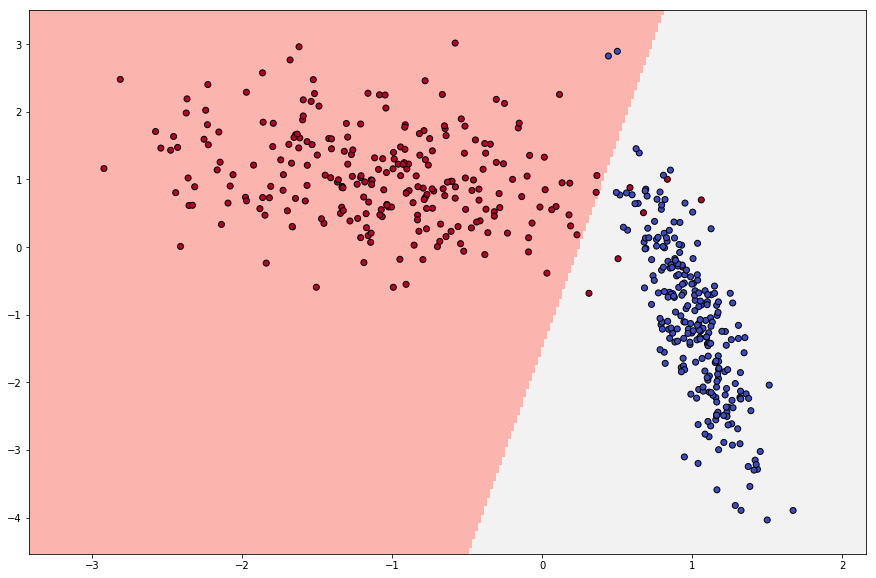

In [21]:
np.random.seed(1000)
nb_samples = 500
fig, ax= plt.subplots(1,1,figsize=(15,10))

def show_dataset(X,Y):
    ax.grid()
    
    for i in range(nb_samples):
        if Y[i]==0:
            ax.scatter(X[i,0],X[i,1],marker='o',color='r')
        else:
            ax.scatter(X[i,0],X[i,1],marker='^',color='b')
    
def show_classification_areas(X,Y,lr):
    x_min,x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max= X[:,1].min() - .5, X[:,1].max() + .5
    xx,yy= np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
    Z=lr.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    
    #plt.figure(1,figsize=(15,10))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)
    
    ax.scatter(X[:,0],X[:,1],c=np.abs(Y-1),edgecolors='k',cmap=plt.cm.coolwarm)
    
    plt.show()

X,Y=make_classification(n_samples=nb_samples,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1)
show_dataset(X,Y)

lr=LogisticRegression()
lr.fit(X,Y)
show_classification_areas(X,Y,lr)
#logestic regression

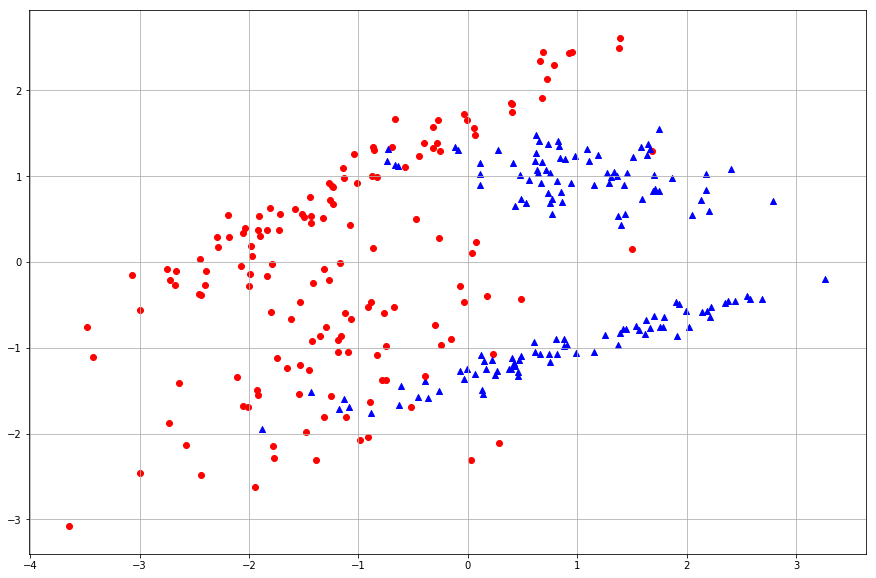

In [22]:
from sklearn.datasets import make_classification

np.random.seed(1000)
nb_samples = 300

def show_dataset(X,Y):
    fig,ax= plt.subplots(1,1,figsize=(15,10))
    
    ax.grid()
    for i in range(nb_samples):
        if Y[i]==0:
            ax.scatter(X[i,0],X[i,1],marker='o',color='r')
        else:
            ax.scatter(X[i,0],X[i,1],marker='^',color='b')
    plt.show()
    
X,Y= make_classification(n_samples=nb_samples,n_features=2, n_informative=2,n_redundant=0)
show_dataset(X,Y)

In [23]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
bnb= BernoulliNB(binarize=0.0)
bnb.fit(X_train,Y_train)
bnb.score(X_test,Y_test)
data=np.array([[0,0],[1,0]])
bnb.predict(data)

#naive bayes algorithm

array([0, 1])

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import DictVectorizer

data= [
    {'house':100,'street':50,'shop':25,'car':100,'tree':20},
    {'house':5,'street':5,'shop':0,'car':10,'tree':500,'river':1}
]
dv=DictVectorizer(sparse=False)
X= dv.fit_transform(data)
Y=np.array([1,0])

mnb= MultinomialNB()
mnb.fit(X,Y)
test_data=[
     {'house':80,'street':20,'shop':15,'car':70,'tree':10,'river':1},
    {'house':10,'street':5,'shop':1,'car':8,'tree':300,'river':0}
]
mnb.predict(dv.fit_transform(test_data))

# this is usage for multi dimentional input

array([1, 0])

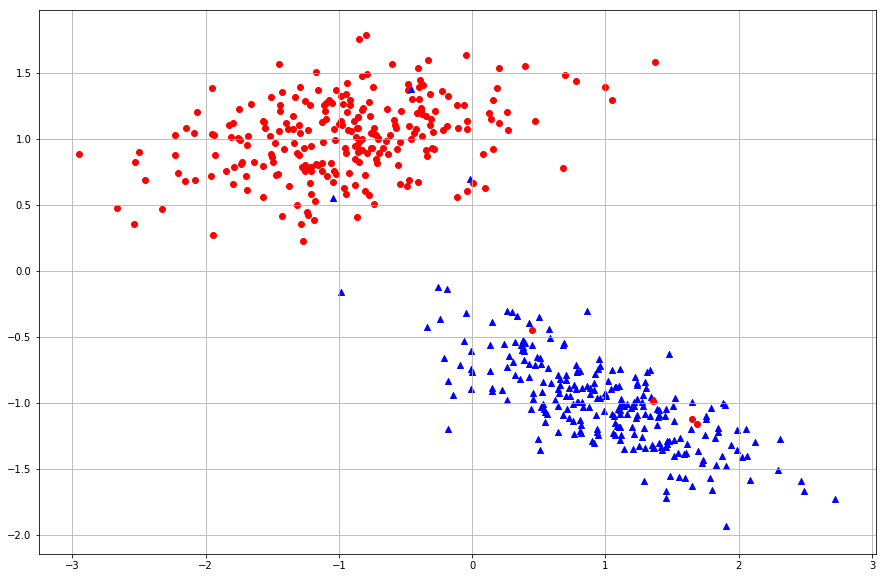

In [28]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

np.random.seed(100)

nb_samples= 500

def show_dataset(X,Y):
    fig,ax= plt.subplots(1,1,figsize=(15,10))
    
    ax.grid()
    for i in range(nb_samples):
        if Y[i]==0:
            ax.scatter(X[i,0],X[i,1],marker='o',color='r')
        else:
            ax.scatter(X[i,0],X[i,1],marker='^',color='b')
    plt.show()
    
X,Y= make_classification(n_samples=nb_samples,n_features=2, n_informative=2,n_redundant=0,n_clusters_per_class=1)
show_dataset(X,Y)
svc=SVC(kernel='linear')


    

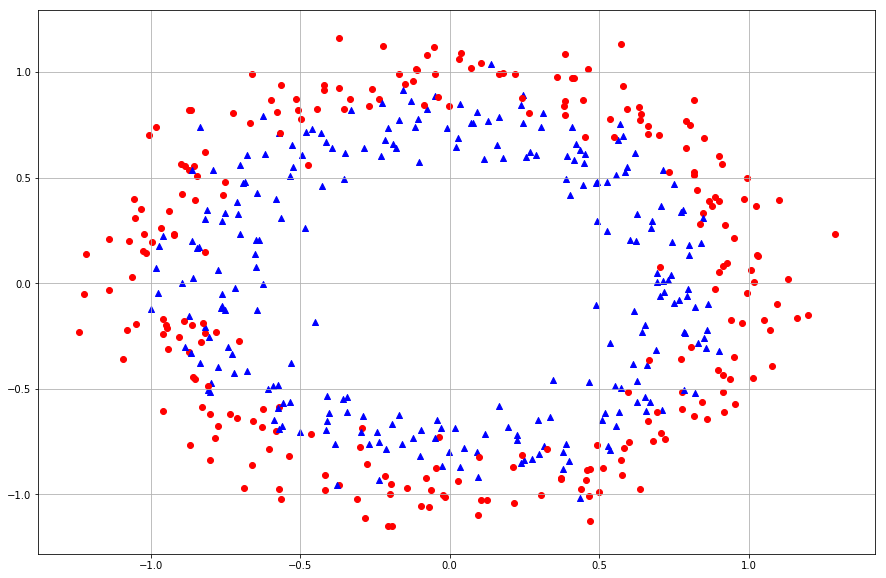

In [31]:
from sklearn.datasets import make_circles

X,Y= make_circles(n_samples=nb_samples,noise=.1)
show_dataset(X,Y)

In [37]:
import multiprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid=[
    {
        'kernel':['linear','rbf','poly','sigmoid'],
         'C':[.1,.2,.4,.5,1.0,1.5,1.8,2.0,2.5,3.0]
    }
]
gs=GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=multiprocessing.cpu_count())
gs.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
gs.best_estimator_

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
gs.best_score_

0.84999999999999998